In [66]:

import pandas
import matplotlib.pyplot as plt
import numpy as np
import tensorflow  as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



### TASK 1

In [25]:

iris_dt = pandas.read_csv("/content/IRIS.csv")


In [26]:
iris_dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_dt.shape

(150, 5)

In [28]:
iris_dt.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

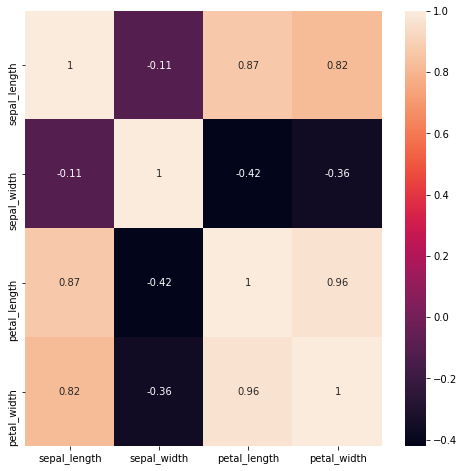

In [29]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(iris_dt.corr(),annot=True)
plt.show()

The target column is 'species' for the given dataset so a basic exploration of different classes associated with are obsereved to check if the data is balanced or not.

In [30]:
iris_dt['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

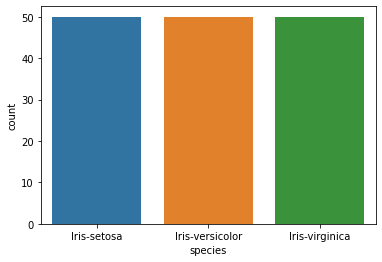

In [31]:
sns.countplot(x='species', data=iris_dt)
plt.show()

In [35]:
#input features and target variable are stored in separate variables X and Y

X=iris_dt.drop(labels=['species'],axis=1)
Y=iris_dt['species']
Y=np.array(Y).reshape(-1, 1)

print(X.shape,len(Y))

(150, 4) 150


In [36]:
#Encoding the values of target column 'species' using One hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

Y=enc.fit_transform(Y)


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


*Using adam optimizer, total epochs= 60 and accuracy as metric in all the three cases.




**CASE 1:** Using 1 hidden layer with 8 nodes.

In [106]:

np.random.seed(10)
tf.random.set_seed(10)

def ANN0():
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [107]:
ANN_0=ANN0
estimator0 = KerasClassifier(build_fn=ANN_0, epochs=60)
estimator0.fit(X_train,Y_train)

(None, 3)
Epoch 1/60
4/4 [==============================] - 0s 3ms/step - loss: 5.1951 - accuracy: 0.3333
Epoch 2/60
4/4 [==============================] - 0s 4ms/step - loss: 5.0009 - accuracy: 0.3333
Epoch 3/60
4/4 [==============================] - 0s 3ms/step - loss: 4.8118 - accuracy: 0.3333
Epoch 4/60
4/4 [==============================] - 0s 3ms/step - loss: 4.6131 - accuracy: 0.3333
Epoch 5/60
4/4 [==============================] - 0s 3ms/step - loss: 4.4305 - accuracy: 0.3333
Epoch 6/60
4/4 [==============================] - 0s 2ms/step - loss: 4.2527 - accuracy: 0.3333
Epoch 7/60
4/4 [==============================] - 0s 2ms/step - loss: 4.0770 - accuracy: 0.3333
Epoch 8/60
4/4 [==============================] - 0s 2ms/step - loss: 3.9064 - accuracy: 0.3333
Epoch 9/60
4/4 [==============================] - 0s 2ms/step - loss: 3.7501 - accuracy: 0.3333
Epoch 10/60
4/4 [==============================] - 0s 2ms/step - loss: 3.5943 - accuracy: 0.3333
Epoch 11/60
4/4 [============

In [108]:
test_acc0= estimator0.score(X_test,Y_test)

print('\nTest accuracy:',test_acc0)

1/1 [==============================] - 0s 108ms/step - loss: 0.9708 - accuracy: 0.6667

Test accuracy: 0.6666666865348816


**CASE 2:** Using 1 hidden layer with 16 nodes.

In [103]:

np.random.seed(10)
tf.random.set_seed(10)

def ANN1():
  model = Sequential()
  model.add(Dense(16, input_dim=4, activation='relu'))
  #model.add(Dense(8,activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [104]:
ANN_1=ANN1
estimator1 = KerasClassifier(build_fn=ANN_1, epochs=60)
estimator1.fit(X_train,Y_train)


(None, 3)
Epoch 1/60
4/4 [==============================] - 0s 3ms/step - loss: 6.1703 - accuracy: 0.3333
Epoch 2/60
4/4 [==============================] - 0s 5ms/step - loss: 5.9019 - accuracy: 0.3333
Epoch 3/60
4/4 [==============================] - 0s 2ms/step - loss: 5.6401 - accuracy: 0.3333
Epoch 4/60
4/4 [==============================] - 0s 2ms/step - loss: 5.3642 - accuracy: 0.3333
Epoch 5/60
4/4 [==============================] - 0s 3ms/step - loss: 5.1093 - accuracy: 0.3333
Epoch 6/60
4/4 [==============================] - 0s 3ms/step - loss: 4.8611 - accuracy: 0.3333
Epoch 7/60
4/4 [==============================] - 0s 4ms/step - loss: 4.6146 - accuracy: 0.3333
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 4.3723 - accuracy: 0.3333
Epoch 9/60
4/4 [==============================] - 0s 2ms/step - loss: 4.1468 - accuracy: 0.3333
Epoch 10/60
4/4 [==============================] - 0s 3ms/step - loss: 3.9161 - accuracy: 0.3333
Epoch 11/60
4/4 [============

In [105]:
test_acc= estimator1.score(X_test,Y_test)

print('\nTest accuracy:',test_acc)

1/1 [==============================] - 0s 104ms/step - loss: 0.4873 - accuracy: 0.9667

Test accuracy: 0.9666666388511658


**CASE 3:**  Using 2 hidden layers each with 8 nodes.

In [83]:
np.random.seed(10)
tf.random.set_seed(10)

def ANN2():
  model = Sequential()
  model.add(Dense(8, input_dim=4, activation='relu'))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [86]:
ANN_2=ANN2
estimator2 = KerasClassifier(build_fn=ANN_2, epochs=60)
estimator2.fit(X_train,Y_train)

(None, 3)
Epoch 1/60
4/4 [==============================] - 1s 4ms/step - loss: 1.7891 - accuracy: 0.0000e+00
Epoch 2/60
4/4 [==============================] - 0s 3ms/step - loss: 1.7171 - accuracy: 0.0000e+00
Epoch 3/60
4/4 [==============================] - 0s 3ms/step - loss: 1.6538 - accuracy: 0.0000e+00
Epoch 4/60
4/4 [==============================] - 0s 5ms/step - loss: 1.5875 - accuracy: 0.0000e+00
Epoch 5/60
4/4 [==============================] - 0s 3ms/step - loss: 1.5355 - accuracy: 0.0000e+00
Epoch 6/60
4/4 [==============================] - 0s 3ms/step - loss: 1.4906 - accuracy: 0.0000e+00
Epoch 7/60
4/4 [==============================] - 0s 3ms/step - loss: 1.4503 - accuracy: 0.0167
Epoch 8/60
4/4 [==============================] - 0s 3ms/step - loss: 1.4145 - accuracy: 0.0667
Epoch 9/60
4/4 [==============================] - 0s 3ms/step - loss: 1.3825 - accuracy: 0.0750
Epoch 10/60
4/4 [==============================] - 0s 3ms/step - loss: 1.3518 - accuracy: 0.1250
Epoch

In [88]:
pred_Y= estimator2.score(X_test,Y_test)

print('\nTest accuracy:',pred_Y)

1/1 [==============================] - 0s 15ms/step - loss: 0.6526 - accuracy: 0.6667

Test accuracy: 0.6666666865348816


**Best results of 93% accuracy was obtained in CASE 2 the Artificial neural network(ANN) built had 1 hidden layer with 16 nodes.**

### TASK 2

In [144]:

fish_dt = pandas.read_csv("/content/Fish.csv")


In [145]:
fish_dt.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [146]:
fish_dt.shape

(159, 7)

In [147]:
fish_dt.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

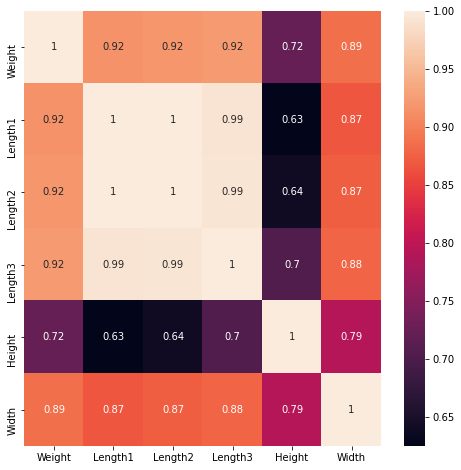

In [148]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(fish_dt.corr(),annot=True)
plt.show()

The target column is 'Species' for the given dataset so a basic exploration of different classes associated with are obsereved to check if the data is balanced or not.

In [149]:
fish_dt['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

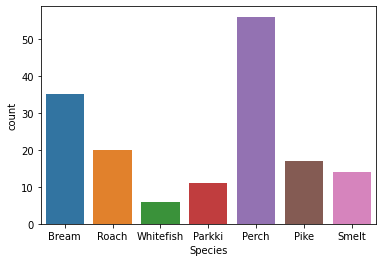

In [150]:
sns.countplot(x='Species', data=fish_dt)
plt.show()

It can be observed that data has unbalanced no of samples with different classes. So data has to be modified as there are three classes: Bream, Perch and Other.

In [151]:
def species_3_class(x):
  if x=='Perch':
    return x
  elif x=='Bream':
    return x
  else:
    return 'Others'

fish_dt['Species']=fish_dt['Species'].apply(species_3_class)

In [152]:
fish_dt['Species'].value_counts()

Others    68
Perch     56
Bream     35
Name: Species, dtype: int64

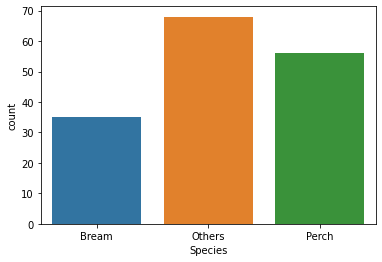

In [153]:
sns.countplot(x='Species', data=fish_dt)
plt.show()

Now the is better balanced than original case.

In [154]:
#input features and target variable are stored in separate variables X and Y

X=fish_dt.drop(labels=['Species'],axis=1)
Y=fish_dt['Species']
Y=np.array(Y).reshape(-1, 1)

print(X.shape,len(Y))

(159, 6) 159


In [155]:
#normalizing the features using standardizing
X=(X-X.mean())/X.std()

In [156]:
#Encoding the values of target column 'Species' using One hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

Y=enc.fit_transform(Y)


In [157]:
#Splitting the data in 70:30 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)

In [158]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(111, 6) (48, 6) (111, 3) (48, 3)


*Using adam optimizer, total epochs= 100 and accuracy as metric in all the three cases.




**CASE 1:** Using 1 hidden layer with 8 nodes.

In [159]:
def Fish_ANN0():
  model = Sequential()
  model.add(Dense(8, input_dim=6, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [207]:

np.random.seed(10)
tf.random.set_seed(10)
ANN_02=Fish_ANN0
estimator02 = KerasClassifier(build_fn=ANN_02, epochs=80)
estimator02.fit(X_train,Y_train)

(None, 3)
Epoch 1/80
4/4 [==============================] - 1s 4ms/step - loss: 1.3884 - accuracy: 0.4595
Epoch 2/80
4/4 [==============================] - 0s 3ms/step - loss: 1.3573 - accuracy: 0.4685
Epoch 3/80
4/4 [==============================] - 0s 3ms/step - loss: 1.3310 - accuracy: 0.4865
Epoch 4/80
4/4 [==============================] - 0s 3ms/step - loss: 1.3046 - accuracy: 0.4955
Epoch 5/80
4/4 [==============================] - 0s 3ms/step - loss: 1.2780 - accuracy: 0.5045
Epoch 6/80
4/4 [==============================] - 0s 3ms/step - loss: 1.2541 - accuracy: 0.5135
Epoch 7/80
4/4 [==============================] - 0s 3ms/step - loss: 1.2283 - accuracy: 0.5225
Epoch 8/80
4/4 [==============================] - 0s 3ms/step - loss: 1.2061 - accuracy: 0.5225
Epoch 9/80
4/4 [==============================] - 0s 3ms/step - loss: 1.1853 - accuracy: 0.5495
Epoch 10/80
4/4 [==============================] - 0s 3ms/step - loss: 1.1642 - accuracy: 0.5495
Epoch 11/80
4/4 [============

In [208]:
test_acc0= estimator02.score(X_test,Y_test)

print('\nTest accuracy:',test_acc0)

2/2 [==============================] - 0s 6ms/step - loss: 0.6892 - accuracy: 0.7500

Test accuracy: 0.75


**CASE 2:** Using 2 hidden layers with one with 8 and other with 16 nodes.

In [221]:

np.random.seed(10)
tf.random.set_seed(10)

def Fish_ANN1():
  model = Sequential()
  model.add(Dense(8, input_dim=6, activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [222]:
ANN_1=Fish_ANN1
estimator01 = KerasClassifier(build_fn=ANN_1, epochs=100)
estimator01.fit(X_train,Y_train)


(None, 3)
Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.1103 - accuracy: 0.3514
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0906 - accuracy: 0.3964
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0705 - accuracy: 0.4324
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0515 - accuracy: 0.4505
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0369 - accuracy: 0.4505
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0231 - accuracy: 0.4595
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0114 - accuracy: 0.4775
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9982 - accuracy: 0.5225
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9873 - accuracy: 0.5495
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9765 - accuracy: 0.5405
Epoch 11/100
4/4 [=

In [223]:
test_acc= estimator01.score(X_test,Y_test)

print('\nTest accuracy:',test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.4500 - accuracy: 0.8125

Test accuracy: 0.8125


**CASE 3:** Using 3 hidden layers with one with 8 and other with 16 nodes.

In [251]:

np.random.seed(10)
tf.random.set_seed(10)

def Fish_ANN2():
  model = Sequential()
  model.add(Dense(8, input_dim=6, activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.output_shape)
  return model

In [252]:
ANN_2=Fish_ANN2
estimator02 = KerasClassifier(build_fn=ANN_2, epochs=100)
estimator02.fit(X_train,Y_train)


(None, 3)
Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0795 - accuracy: 0.4685
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0613 - accuracy: 0.4865
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0427 - accuracy: 0.5135
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0258 - accuracy: 0.5495
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0088 - accuracy: 0.5946
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9915 - accuracy: 0.6306
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9740 - accuracy: 0.6396
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9564 - accuracy: 0.6396
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9395 - accuracy: 0.6486
Epoch 11/100
4/4 [=

In [253]:
test_acc= estimator02.score(X_test,Y_test)

print('\nTest accuracy:',test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.3994 - accuracy: 0.8333

Test accuracy: 0.8333333134651184


**Best results of 83.334% accuracy was obtained in CASE 3 the Artificial neural network(ANN) built had 3 hidden layers with 8 16 and 16 nodes corresponding to each layer.**